In [1]:
from because.probability import prob
from because.synth import read_data


hbe:  0.9490824254306831


In [2]:
r = read_data.Reader('/home/roger/housing2.csv')
ds = r.read()
ps = prob.ProbSpace(ds)
print('ps.N = ', ps.N)
print('ps.fieldList = ', ps.fieldList)

getData:  59120 records read.
ps.N =  59120
ps.fieldList =  ['state', 'region', 'type', 'price', 'sqfeet', 'beds', 'baths']


In [3]:
ps0 = ps.SubSpace([('type', 'house')])
ps1 = ps.SubSpace([('state', 'ca'), ('type','house')])
ps2 = ps.SubSpace([('state', 'fl'), ('type', 'house')]) 
print('ps.N = ', ps1.N, ps2.N)

ps.N =  3190 2714


In [4]:

d1=ps.distr('price')
print('ps1.E(price), ps2.E(price) = ', ps1.E('price'), ps2.E('price'), ps1.E('sqfeet'), ps2.E('sqfeet'))
d2=ps.distr('sqfeet')
d3=ps.distr('beds')
d4=ps.distr('baths')

ps1.E(price), ps2.E(price) =  2447.8166144200627 1353.4867354458363 1791.764263322884 1544.18054532056


In [5]:
ps.stringMap['type']
#print(d1.minVal(), d1.maxVal(), d1.mean())
#print(d2.minVal(), d2.maxVal(), d2.mean())
#print(d3.minVal(), d3.maxVal(), d3.mean())
#print(d4.minVal(), d4.maxVal(), d4.mean())

{'condo': 1, 'duplex': 2, 'house': 3, 'townhouse': 4}

In [6]:

%matplotlib inline
from because.visualization import viz


Test Limit =  0.1 percentile to 99.9 percentile.


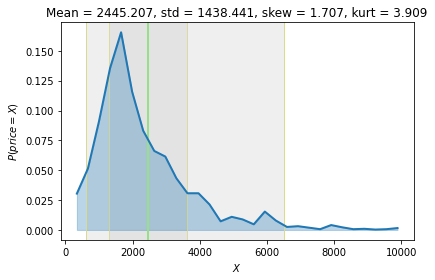

Test Limit =  0.1 percentile to 99.9 percentile.


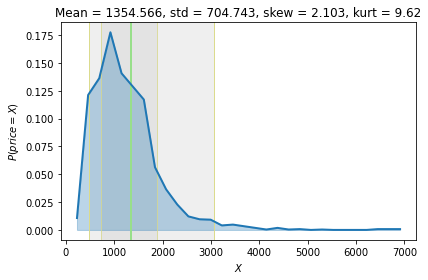

Test Limit =  0.1 percentile to 99.9 percentile.


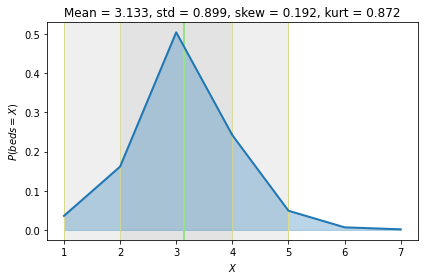

Test Limit =  0.1 percentile to 99.9 percentile.


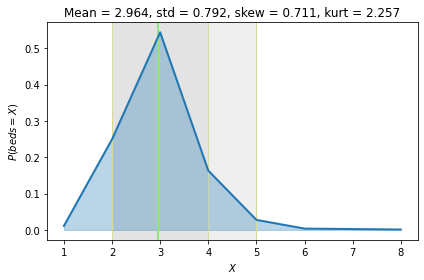

Test Limit =  0.1 percentile to 99.9 percentile.


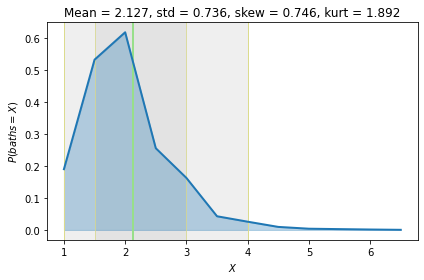

Test Limit =  0.1 percentile to 99.9 percentile.


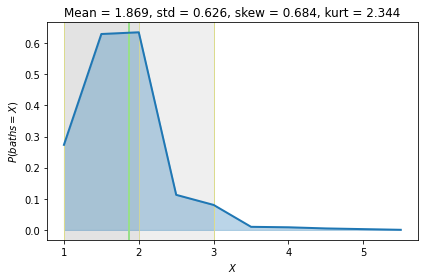

Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  30
Test Time =  0.154


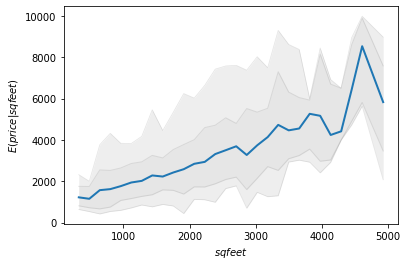

Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  30
Test Time =  0.132


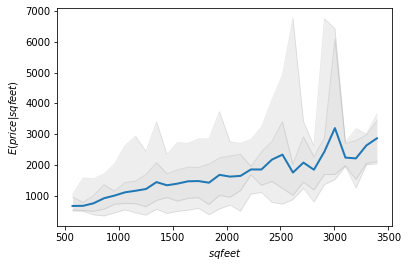

nTests =  77
Test Time =  0.358


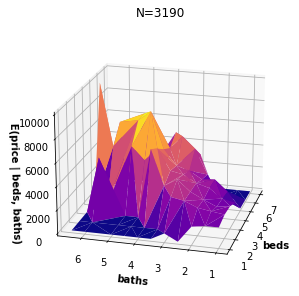

In [7]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
viz.show(probspace=ps1, targetSpec=['price'], condSpec=[])
viz.show(probspace=ps2, targetSpec=['price'], condSpec=[])
viz.show(probspace=ps1, targetSpec=['beds'], condSpec=[])
viz.show(probspace=ps2, targetSpec=['beds'], condSpec=[])
viz.show(probspace=ps1, targetSpec=['baths'], condSpec=[])
viz.show(probspace=ps2, targetSpec=['baths'], condSpec=[])

viz.show(probspace=ps1, targetSpec=['price'], condSpec=['sqfeet'], gtype='exp')
viz.show(probspace=ps2, targetSpec=['price'], condSpec=['sqfeet'], gtype='exp')
viz.show(probspace=ps1, targetSpec=['price'], condSpec=['beds','baths'], gtype='exp')

Controlling for:  [] , power =  1
Test Time =  0.001


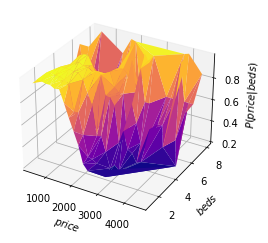

Controlling for:  ['sqfeet'] , power =  5
Test Time =  16.677


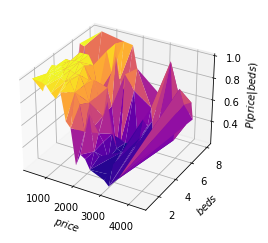

In [22]:
viz.show(probspace=ps, targetSpec=['price'], condSpec=['beds'], gtype='pdf', power=1, enhance=True)
viz.show(probspace=ps, targetSpec=['price'], condSpec=['beds'], controlFor=['sqfeet'], gtype='pdf', enhance=True, power=5)
#viz.show(probspace=ps0, targetSpec=['price'], condSpec=['sqfeet'], gtype='pdf', power=1)
#viz.show(probspace=ps0, targetSpec=['price'], condSpec=['sqfeet'], controlFor=['beds','baths'], gtype='pdf', power=5)

In [26]:
d = ps.distr(('type',), ('price', 5000, None))
print(d.ToHistTuple())

[(1.0, 1.0, 0.14775725593667546), (2.0, 2.0, 0.023746701846965697), (3.0, 3.0, 0.7757255936675461), (4.0, 4.0, 0.052770448548812667)]


In [9]:
d = ps.distr('price', [('type','house'),('state', 'wi')])

In [10]:
print(d.N)
print(d.minVal(), d.maxVal(), d.E(), d.percentile(50))

491
400.0 7199.0 1341.9277448620628 1084.314935064935


In [11]:
ps.isIndependent('price', 'sqfeet')

False

In [12]:
ps.isIndependent('beds', 'price')

False

In [13]:
ps.isIndependent('beds','baths')

False

In [14]:
ps.isIndependent('price', 'sqfeet', 'beds')

False

In [15]:
ps.isIndependent('price', 'beds', 'sqfeet')

False

In [16]:
ps.isIndependent('beds', 'baths', 'sqfeet')

False

In [17]:
ps.isIndependent('price', 'type', 'beds')

False

In [18]:
ps.isIndependent('price', 'sqfeet', 'beds', 'baths')

False

In [19]:
ps.isIndependent('price', 'type', 'price')

False

In [20]:
ps.isIndependent('price', 'sqfeet', 'price')

True

In [21]:
ps.independence('price','beds',['sqfeet', 'baths'])

1.454392162258955e-13